T BHANU KOUSHIK : KAIBURR ASSIGNMENT : TASK 5

T Bhanu Koushik
4TH year AIE
Done With:
1. Installing and Loading the Required Packages
2. Loded The Dataset directly with the help of url and i only took the 20,000 sample for deomstration.
3. Done with handling of null values and observation of the data and outliers and class distribution.
4. Done With EDA Analysis
5. Text Preprocessing and class balance is done
6. Feature Engineering like converting the text vectors using TF-IDF method is done
7. As there is class imbalance i have also tried to balance with the method called SMOTE
8. Training and Testing splitting of the dataset is done
9. I have used XGBOOST Model as it can handle Multiclassfiication efficiently and i also tried to research using standard medium website documentation for implementing these model
10. Results
11. Comparsion is done using the Logictic Regression Model

In [2]:
# Task 5 : Kaiburr
# Title: Text Classification on consumer complaints

Installing The Libearies That are required as of Now

In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install imblearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [24]:
import re
import nltk # For NLP as dataset contain the text

Loding the Dataset Through Online as Dataset Size is More and im takig 20,000 sample to train and test it

In [25]:
# Loding the Dataset and i took only 20,000 samples as dataset size was huge and my local is not able process it and also i tried to do in google colab but it was taking huge time to load so just i want to keep it clear .
import pandas as pd
# Loading the Dataset Directly using the URL


url = "https://files.consumerfinance.gov/ccdb/complaints.csv.zip"

df = pd.read_csv(url, compression='zip', nrows=20000, low_memory=False)

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (20000, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-07-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,346XX,NaN,Other,Web,2020-07-06,Closed with explanation,Yes,NaN,3730948
1,2025-10-14,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,NaN,NaN,"EQUIFAX, INC.",TX,75062,NaN,NaN,Web,2025-10-14,In progress,Yes,NaN,16558024
2,2025-10-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30341,NaN,NaN,Web,2025-10-10,In progress,Yes,NaN,16507707
3,2025-10-15,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75287,NaN,NaN,Web,2025-10-15,In progress,Yes,NaN,16593757
4,2025-10-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NC,27127,NaN,NaN,Web,2025-10-17,In progress,Yes,NaN,16649455


In [26]:
# Extracting the column names
print("Columns Names:\n", df.columns.tolist())


Columns Names:
 ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


In [27]:
# Extracting the Number of Columns and Rows
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")


Number of rows: 20000
Number of columns: 18


In [28]:
# We will Extract the first 5 and last 5 rows
print("First 5 Rows:")
display(df.head())

print("\n Last 5 Rows:")
display(df.tail())

First 5 Rows:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-07-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,346XX,NaN,Other,Web,2020-07-06,Closed with explanation,Yes,NaN,3730948
1,2025-10-14,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,NaN,NaN,"EQUIFAX, INC.",TX,75062,NaN,NaN,Web,2025-10-14,In progress,Yes,NaN,16558024
2,2025-10-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30341,NaN,NaN,Web,2025-10-10,In progress,Yes,NaN,16507707
3,2025-10-15,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75287,NaN,NaN,Web,2025-10-15,In progress,Yes,NaN,16593757
4,2025-10-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NC,27127,NaN,NaN,Web,2025-10-17,In progress,Yes,NaN,16649455



 Last 5 Rows:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
19995,2025-09-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,GA,313XX,NaN,NaN,Web,2025-09-25,In progress,Yes,NaN,16181650
19996,2025-10-12,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",CA,90401,NaN,NaN,Web,2025-10-12,In progress,Yes,NaN,16525250
19997,2025-10-09,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,11208,NaN,NaN,Web,2025-10-09,In progress,Yes,NaN,16469882
19998,2025-10-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78539,NaN,NaN,Web,2025-10-17,In progress,Yes,NaN,16621882
19999,2025-09-23,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",IL,60490,NaN,NaN,Web,2025-09-23,In progress,Yes,NaN,16075865


In [29]:
# Now we will gain the knowledge on the Datatypes of Each Attribute(column)
# These is one of the important step in the analysing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 20000 non-null  object
 1   Product                       20000 non-null  object
 2   Sub-product                   19979 non-null  object
 3   Issue                         20000 non-null  object
 4   Sub-issue                     19609 non-null  object
 5   Consumer complaint narrative  1353 non-null   object
 6   Company public response       1971 non-null   object
 7   Company                       20000 non-null  object
 8   State                         19956 non-null  object
 9   ZIP code                      19991 non-null  object
 10  Tags                          523 non-null    object
 11  Consumer consent provided?    2957 non-null   object
 12  Submitted via                 20000 non-null  object
 13  Date sent to com

So From Above Cell We Get To Known that Except Complaint Id other columns data types are "Object" meaning either its a string/text

In [30]:
# Now we will Take Random Row and  then we will check the its datatypes
a=df['Consumer complaint narrative'].head()
print(a)
b=df['Date received'].head()
print(b)
c=df['Sub-issue'].head()
print(c)




0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Consumer complaint narrative, dtype: object
0    2020-07-06
1    2025-10-14
2    2025-10-10
3    2025-10-15
4    2025-10-17
Name: Date received, dtype: object
0                  Information belongs to someone else
1    Information is missing that should be on the r...
2                  Information belongs to someone else
3                  Information belongs to someone else
4                  Information belongs to someone else
Name: Sub-issue, dtype: object


Now We Will Fetch the All The Null Values

In [31]:
null_counts = df.isnull().sum()
print("Number of missing values per column:\n")
print(null_counts)


Number of missing values per column:

Date received                       0
Product                             0
Sub-product                        21
Issue                               0
Sub-issue                         391
Consumer complaint narrative    18647
Company public response         18029
Company                             0
State                              44
ZIP code                            9
Tags                            19477
Consumer consent provided?      17043
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?              19925
Complaint ID                        0
dtype: int64


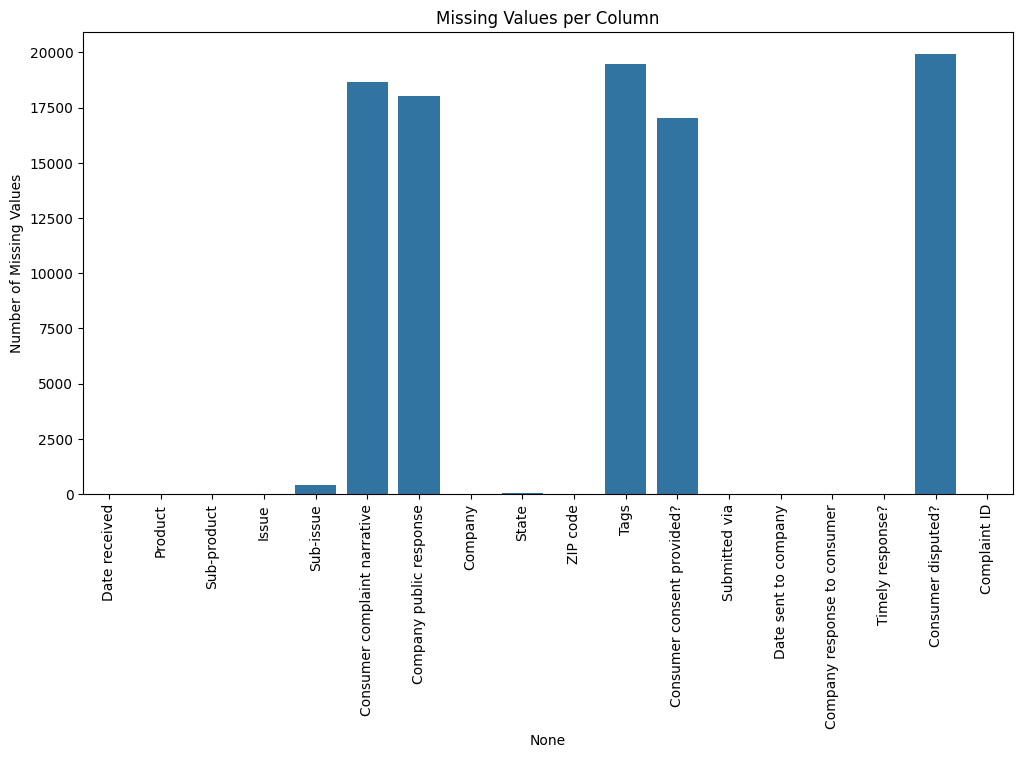

In [32]:
# Now we will visuvalize using Bar Chart so that it will be easy to visuvalize
import matplotlib.pyplot as plt
import seaborn as sns
null_counts = df.isnull().sum()
plt.figure(figsize=(12,6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=90)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.show()



Checking How much each feature will contribute to the final prediction

In [33]:
# Now we will check and count the unique values for column , which is  one of the important aspect for the building the proper prediction model
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Date received: 1221 unique values
Product: 17 unique values
Sub-product: 57 unique values
Issue: 98 unique values
Sub-issue: 173 unique values
Consumer complaint narrative: 1263 unique values
Company public response: 10 unique values
Company: 513 unique values
State: 58 unique values
ZIP code: 6408 unique values
Tags: 3 unique values
Consumer consent provided?: 4 unique values
Submitted via: 5 unique values
Date sent to company: 1204 unique values
Company response to consumer: 7 unique values
Timely response?: 2 unique values
Consumer disputed?: 2 unique values
Complaint ID: 20000 unique values


In [34]:
# Checking correlation with target so that i will get to known how much each column is important to target column
categorical_cols = ['Sub-product', 'Sub-issue', 'State', 'ZIP code']

for col in categorical_cols:
    print(f"\nValue counts of {col} by Product:")
    print(pd.crosstab(df[col], df['Product']))



Value counts of Sub-product by Product:
Product                                           Bank account or service  \
Sub-product                                                                 
Auto                                                                    0   
Auto debt                                                               0   
Check cashing service                                                   0   
Checking account                                                        5   
Conventional adjustable mortgage (ARM)                                  0   
Conventional fixed mortgage                                             0   
Conventional home mortgage                                              0   
Credit card debt                                                        0   
Credit repair services                                                  0   
Credit reporting                                                        0   
Debt settlement                    

In [35]:
# Calculating the missing ratio for each column so that we can conclude that columns with too maany missing values can not contribute to
missing_ratio = df.isnull().sum() / len(df)
missing_ratio.sort_values(ascending=False)


,0
Consumer disputed?,0.99625
Tags,0.97385
Consumer complaint narrative,0.93235
Company public response,0.90145
Consumer consent provided?,0.85215
Sub-issue,0.01955
State,0.00220
Sub-product,0.00105
ZIP code,0.00045
Date received,0.00000


In [36]:
# Checking the lenght of the description of the complaint raised by the customer so that i can think that longer text may give better classification prediction
df['text_length'] = df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))
df[['Product','text_length']].groupby('Product').mean()


,text_length
Product,
Bank account or service,26.250000
Checking or savings account,48.496689
Consumer Loan,1.000000
Credit card,42.133758
Credit card or prepaid card,143.820513
Credit reporting,3.692308
Credit reporting or other personal consumer reports,7.459780
"Credit reporting, credit repair services, or other personal consumer reports",55.768786
Debt collection,30.176412


In [37]:
# Filling missing complaint text with empty string instead of dropping because i also tried that approach , im lossing the huge samples so that's why im going with these approach
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna('')

print("Dataset shape after filling missing complaint text:", df.shape)


Dataset shape after filling missing complaint text: (20000, 19)


In [38]:
# These are like medium importance columns
optional_cols = ['Sub-product', 'Sub-issue', 'State', 'ZIP code']

for col in optional_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')


In [39]:
df.isnull().sum()


,0
Date received,0
Product,0
Sub-product,0
Issue,0
Sub-issue,0
Consumer complaint narrative,0
Company public response,18029
Company,0
State,0
ZIP code,0


In [40]:
# Filling the other columns null values with the dummy text
df['Company public response'] = df['Company public response'].fillna('No Response')
df['Tags'] = df['Tags'].fillna('Unknown')
df['Consumer disputed?'] = df['Consumer disputed?'].fillna('Unknown')


In [41]:
# Checking again if there are null values
df.isnull().sum()


,0
Date received,0
Product,0
Sub-product,0
Issue,0
Sub-issue,0
Consumer complaint narrative,0
Company public response,0
Company,0
State,0
ZIP code,0


Now its time for analysing the data in-depth like seeing the ranges of values and outliers so then we can normalize the data.

In [42]:
# We will seperate the categorical and numeric values
df.select_dtypes(include=['int64', 'float64']).columns


Index(['Complaint ID', 'text_length'], dtype='object')

From Below i can observe that the text lenght has 150-200 characters (short-medium) and a very few are very long (above 1000 characters) likely to be outliers

In [43]:
# Now we will observe the data using describe method
df.describe()


,Complaint ID,text_length
count,2.000000e+04,20000.000000
mean,1.535510e+07,13.174200
std,2.971915e+06,62.891399
min,3.991800e+04,1.000000
25%,1.606188e+07,1.000000
50%,1.625939e+07,1.000000
75%,1.645567e+07,1.000000
max,1.667758e+07,2836.000000


/tmp/ipython-input-435626716.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index, palette='viridis')


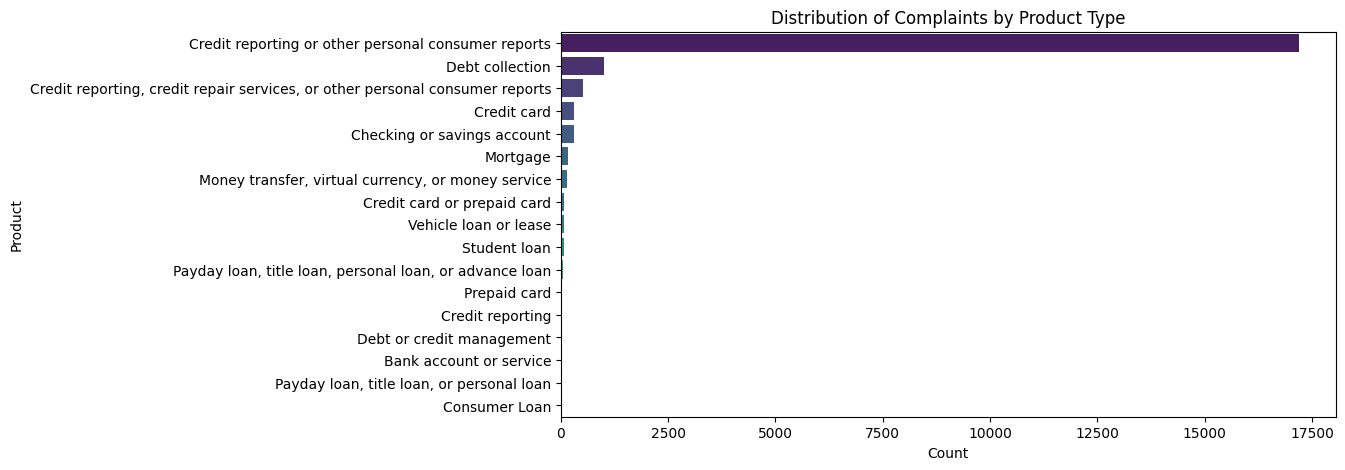

In [44]:
# Now we will analyse the class distribution of the target column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index, palette='viridis')
plt.title('Distribution of Complaints by Product Type')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()



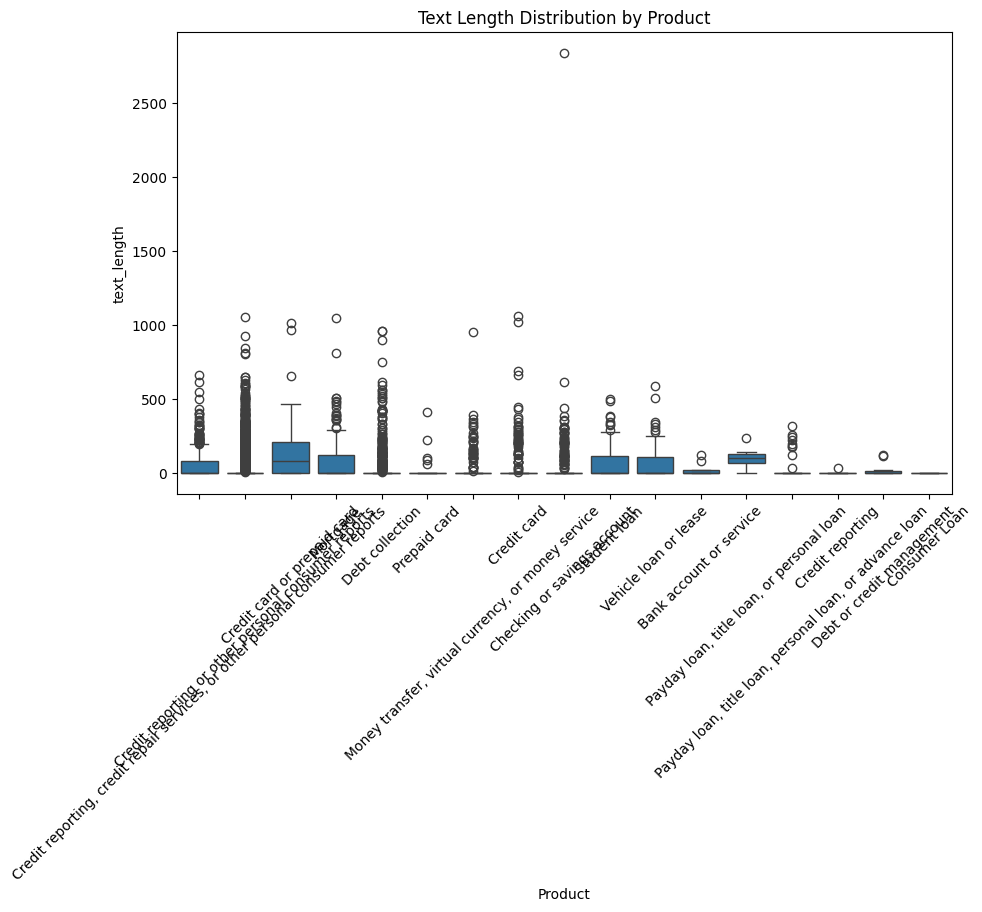

In [247]:
# Analysing the text length by product type
plt.figure(figsize=(10,6))
sns.boxplot(x='Product', y='text_length', data=df)
plt.title('Text Length Distribution by Product')
plt.xticks(rotation=45)
plt.show()


Now we are done wth EDA Analysis now we will balance the imbalance the data like handling the outliers and the class distribution

In [45]:
upper_limit = df['text_length'].quantile(0.95)
df['text_length'] = df['text_length'].clip(upper=upper_limit)


In [46]:
# Mergeing rare classes into 'Other' to blance the sample rate while splitting the data because if certain class is dominating then model may be bias and it will predict the wrong results.
rare_classes = df['Product'].value_counts()[df['Product'].value_counts() < 50].index
df['Product'] = df['Product'].apply(lambda x: 'Other' if x in rare_classes else x)


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_final = le.fit_transform(df['Product'])


In [51]:
import numpy as np
print("Unique target classes:", len(np.unique(y_final)))


Unique target classes: 11


Now Text Pre-processing Steps like Tokenization, stemming, TF-IDF, and etc

In [52]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['Consumer complaint narrative'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Feature Enginnering and Normalization

Now im extracting the keywords which will be given as addidtional parameter to the model so that prediction of the class will be very accurate and also i also added the text lenght as extra feature for the model.


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['clean_text'])


In [54]:
import numpy as np

# Define keywords per category
keywords = {
    'Credit reporting': ['credit report', 'fraud alert', 'fico', 'score', 'credit bureau'],
    'Debt collection': ['collection', 'debt', 'owed', 'harassment'],
    'Consumer Loan': ['loan', 'interest rate', 'late fee', 'installment'],
    'Mortgage': ['mortgage', 'refinance', 'foreclosure', 'escrow']
}

def keyword_features(text):
    features = []
    text = text.lower()
    for category, words in keywords.items():
        features.append(int(any(word in text for word in words)))
    return features

keyword_feats = df['clean_text'].apply(keyword_features)
keyword_feats = np.array(keyword_feats.tolist())


In [55]:
text_length_feat = df['text_length'].values.reshape(-1, 1)


In [56]:
import scipy.sparse as sp

X_final = sp.hstack([X_tfidf, keyword_feats, text_length_feat])
print("Final feature matrix shape:", X_final.shape)
print("Target labels shape:", y_final.shape)


Final feature matrix shape: (20000, 5005)
Target labels shape: (20000,)


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)


In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

import pandas as pd
print("Class distribution after SMOTE:\n", pd.Series(y_train_res).value_counts())


Class distribution after SMOTE:
 3     13754
6     13754
5     13754
4     13754
0     13754
7     13754
2     13754
8     13754
1     13754
10    13754
9     13754
Name: count, dtype: int64


In [59]:
import xgboost as xgb

model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_final)),
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    random_state=42,
    use_label_encoder=False
)

model.fit(X_train_res, y_train_res)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:15:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=11, ...)

Model Accuracy: 87.42%

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.13      0.23        60
           1       0.29      0.03      0.06        63
           2       0.42      0.31      0.36        16
           3       0.89      0.99      0.94      3439
           4       0.51      0.27      0.35       104
           5       0.68      0.10      0.18       202
           6       0.33      0.06      0.11        31
           7       0.89      0.24      0.38        33
           8       0.50      0.04      0.08        23
           9       0.50      0.14      0.22        14
          10       0.25      0.07      0.11        15

    accuracy                           0.87      4000
   macro avg       0.54      0.22      0.27      4000
weighted avg       0.84      0.87      0.84      4000



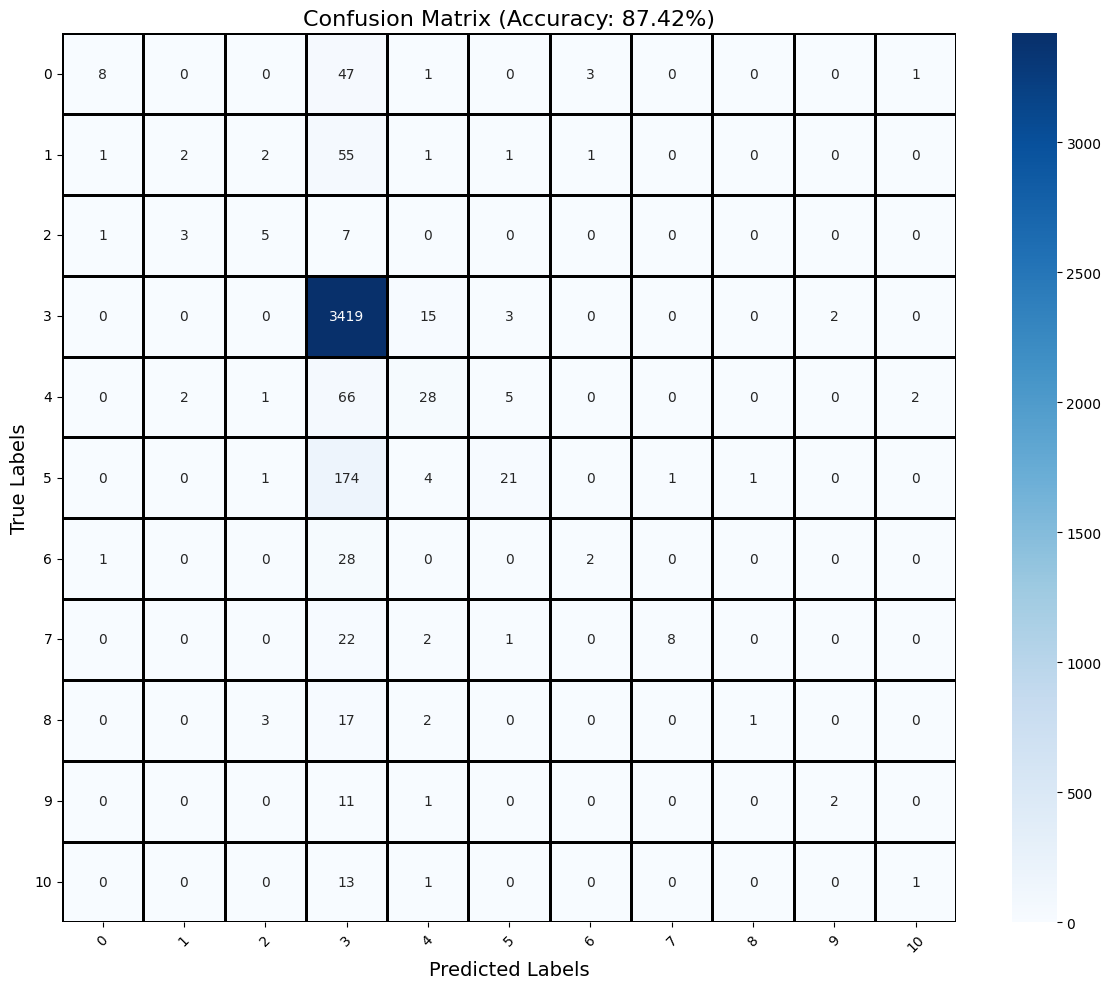

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy: {accuracy:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=1, linecolor='black')

plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f}%)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Comparision of the my model with other model , here i took "Logictic Regression"

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Accuracy: 85.85%

Classification Report:
                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.50      0.12      0.19        60
                                                                 Credit card       0.33      0.05      0.08        63
                                                 Credit card or prepaid card       0.45      0.31      0.37        16
                         Credit reporting or other personal consumer reports       0.89      0.97      0.93      3439
Credit reporting, credit repair services, or other personal consumer reports       0.28      0.38      0.32       104
                                                             Debt collection       0.63      0.11      0.19       202
                          Money transfer, virtual currency, or money service       0.50      0.16      0.24        31
       

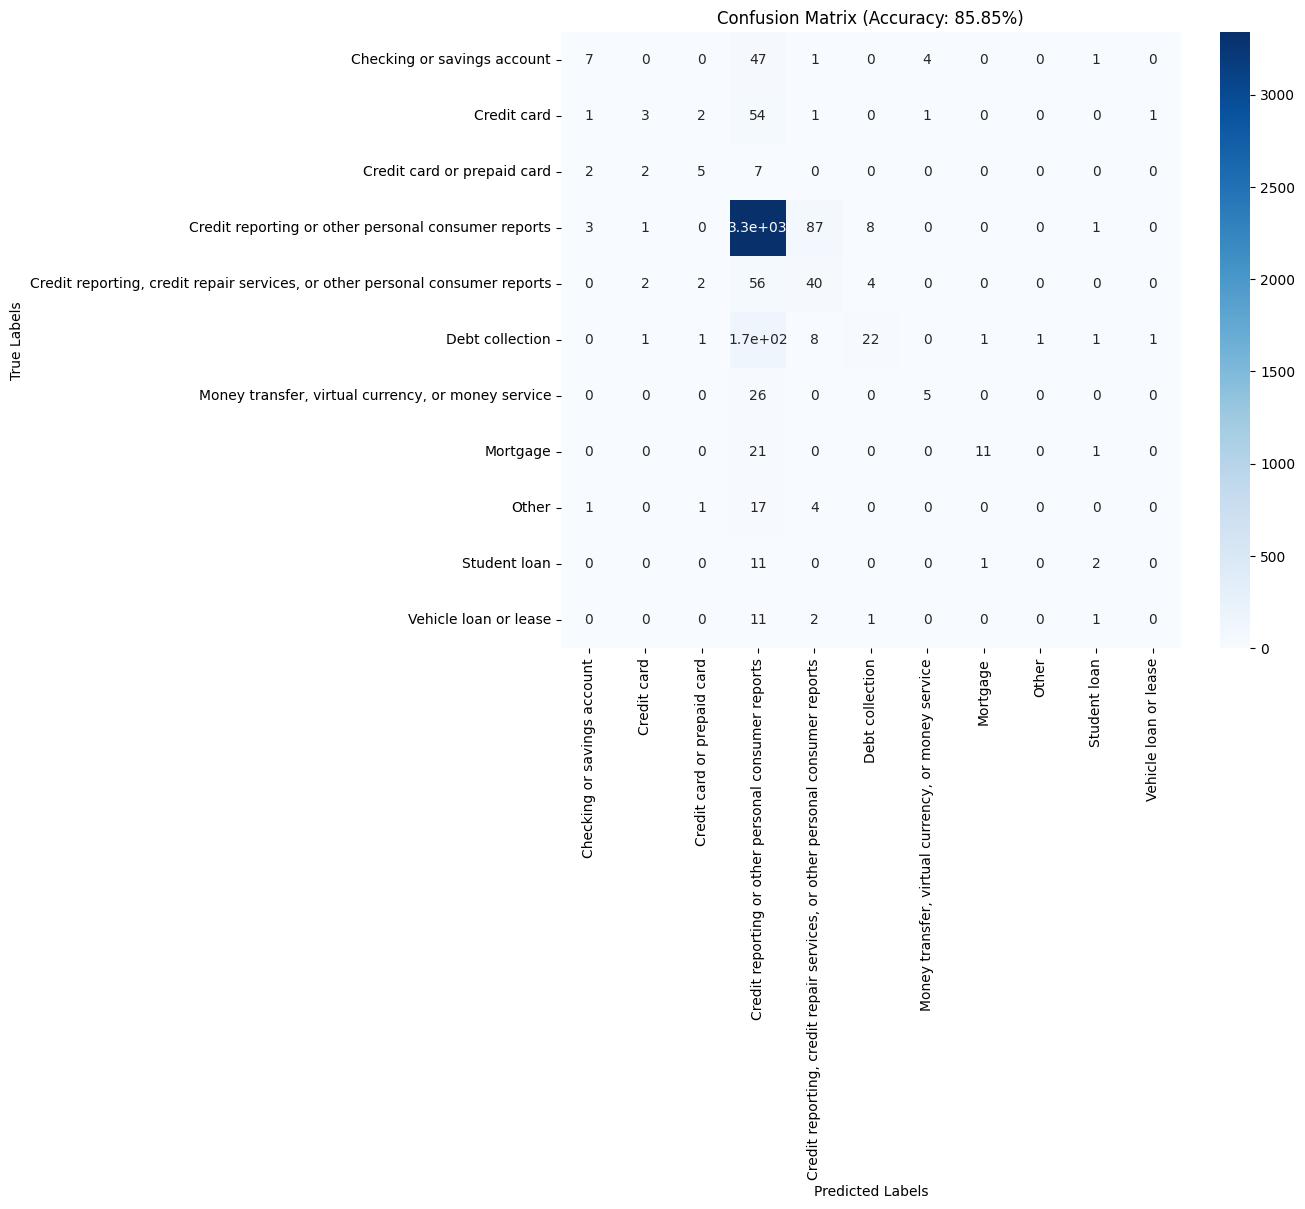

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)
model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"\nModel Accuracy: {acc:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix (Accuracy: {acc:.2f}%)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
